 # **Veri Seti Hikayesi**
* Pregnancies : Hamilelik
* Glucose :     Vücuttaki glikoz değeri
* BloodPressure: Tansiyon
* Skin Thickness : Cilt Kalınlığı
* Insulin : İnsülin değeri
* BMI : Vücut kitle indexi (Vücut Kitle İndeksi (VKİ) = Vücut Ağırlığı (kg.) / Boy uzunluğunun karesi (m.))
* DiabetesPedigreeFunction :Diyabet soyağacı fonksiyonu (aile geçmişine dayalı diyabet olasılığını puanlayan bir fonksiyon)
* Age : Yaş 
* Outcome: Sonuç (1:Diabetes,0:Non Diabetes)

## Raporlama CRISP-DM
### Veriyi Anlama
### Veri Ön İşleme
### Feature engineering
### Base Modellerin Sonuçları
### Optimize Edilmiş Modeller (feat. eng, veri ön işleme, hiperparametre optimizasyonu)

In [1]:
import warnings
warnings.simplefilter(action = "ignore") 

In [2]:
#!pip install lightgbm

In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier

In [4]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()

In [5]:
df.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
df.shape

(768, 9)

In [7]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Logistic Regression

In [8]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
log_model = LogisticRegression(random_state = 12345).fit(X,y)
y_pred = log_model.predict(X)
print("Accuracy Score  : " ,accuracy_score(y, y_pred))
print("cross_val_score  :" , cross_val_score(log_model, X, y, cv = 10).mean())


Accuracy Score  :  0.7825520833333334
cross_val_score  : 0.7708475734791526


# KNN 

In [9]:
knn_model = KNeighborsClassifier().fit(X,y)
y_pred = knn_model.predict(X)
print("Accuracy Score  : " ,accuracy_score(y, y_pred))
print("cross_val_score : ", cross_val_score(knn_model, X, y, cv = 10).mean())

Accuracy Score  :  0.8033854166666666
cross_val_score :  0.7213773069036227


# Support Vector Machines (SVM)

In [10]:
svm_model = SVC(random_state = 12345).fit(X,y)
y_pred = svm_model.predict(X)
print("Accuracy Score  : " ,accuracy_score(y, y_pred))
print("cross_val_score : ", cross_val_score(svm_model, X, y, cv = 10).mean())

Accuracy Score  :  0.7682291666666666
cross_val_score :  0.7578605604921396


# Yapay Sinir Ağları

In [11]:
mlp_model = MLPClassifier(random_state = 12345).fit(X,y)
y_pred = mlp_model.predict(X)
print("Accuracy Score  : " ,accuracy_score(y, y_pred))
print("cross_val_score : ", cross_val_score(mlp_model, X, y, cv = 10).mean())

Accuracy Score  :  0.76171875
cross_val_score :  0.7082365003417636


# CART 

In [12]:
cart_model = DecisionTreeClassifier(random_state = 12345).fit(X,y)
y_pred = cart_model.predict(X)
print("Accuracy Score  : " ,accuracy_score(y, y_pred))
print("cross_val_score : ", cross_val_score(cart_model, X, y, cv = 10).mean())

Accuracy Score  :  1.0
cross_val_score :  0.705622009569378


# RF

In [13]:
rf_model = RandomForestClassifier(random_state = 12345).fit(X,y)
y_pred = rf_model.predict(X)
print("Accuracy Score  : " ,accuracy_score(y, y_pred))
print("cross_val_score : ", cross_val_score(rf_model, X, y, cv = 10).mean())

Accuracy Score  :  1.0
cross_val_score :  0.7643028024606972


# GradientBoosting

In [14]:
gbm_model = GradientBoostingClassifier(random_state = 12345).fit(X,y)
y_pred = gbm_model.predict(X)
print("Accuracy Score  : " ,accuracy_score(y, y_pred))
print("cross_val_score : ", cross_val_score(gbm_model, X, y, cv = 10).mean())

Accuracy Score  :  0.90625
cross_val_score :  0.7617053998632947


# LightCBM

In [15]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
lgbm = LGBMClassifier(random_state=12345).fit(X,y)
y_pred = lgbm.predict(X)
print("accuracy_score" , accuracy_score(y, y_pred))
print("cross_val_score",cross_val_score(lgbm, X, y, cv = 10).mean())

accuracy_score 1.0
cross_val_score 0.7343984962406016


In [16]:
 #!pip install catboost

# Catboost

In [17]:
cat_model = CatBoostClassifier(random_state = 12345).fit(X,y)
y_pred = cat_model.predict(X)
print("Accuracy Score  : " ,accuracy_score(y, y_pred))
print("cross_val_score : ", cross_val_score(cat_model, X, y, cv = 10).mean())

Learning rate set to 0.009204
0:	learn: 0.6885758	total: 75.4ms	remaining: 1m 15s
1:	learn: 0.6842854	total: 79.5ms	remaining: 39.6s
2:	learn: 0.6799736	total: 82.8ms	remaining: 27.5s
3:	learn: 0.6766846	total: 88.8ms	remaining: 22.1s
4:	learn: 0.6716747	total: 93.1ms	remaining: 18.5s
5:	learn: 0.6679803	total: 97.8ms	remaining: 16.2s
6:	learn: 0.6631055	total: 102ms	remaining: 14.4s
7:	learn: 0.6587994	total: 106ms	remaining: 13.1s
8:	learn: 0.6550050	total: 110ms	remaining: 12.1s
9:	learn: 0.6515419	total: 114ms	remaining: 11.3s
10:	learn: 0.6468881	total: 118ms	remaining: 10.6s
11:	learn: 0.6421185	total: 122ms	remaining: 10.1s
12:	learn: 0.6382281	total: 126ms	remaining: 9.54s
13:	learn: 0.6343403	total: 130ms	remaining: 9.16s
14:	learn: 0.6308034	total: 134ms	remaining: 8.78s
15:	learn: 0.6266922	total: 138ms	remaining: 8.46s
16:	learn: 0.6232949	total: 141ms	remaining: 8.14s
17:	learn: 0.6190741	total: 144ms	remaining: 7.88s
18:	learn: 0.6153419	total: 148ms	remaining: 7.66s
19:	

In [18]:
#Accuracy Score  :  0.9427083333333334
#Learning rate set to 0.008798
# cross_val_score :  0.7590738209159263

# XGBoost 

In [19]:
#!pip install xgboost

In [20]:
from xgboost import XGBClassifier

In [21]:
xgboost_model = XGBClassifier(random_state = 12345).fit(X,y)
y_pred = xgboost_model.predict(X)
print("Accuracy Score  : " ,accuracy_score(y, y_pred))
print("cross_val_score : ", cross_val_score(xgboost_model, X, y, cv = 10).mean())

Accuracy Score  :  1.0
cross_val_score :  0.7357142857142857


# Data Preprocessing(Veri Ön İşleme)
# Veriyi İnceleme

In [22]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [23]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [24]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [25]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [26]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [27]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [28]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [29]:
df.describe([0.1,0.20,0.35,0.80,0.90,0.99]).T

,count,mean,std,min,10%,20%,35%,50%,80%,90%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.0000,2.00000,3.0000,7.000,9.0000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,95.0000,106.00000,117.0000,147.000,167.0000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,60.0000,66.00000,72.0000,82.000,88.0000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.0000,15.00000,23.0000,35.000,40.0000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.0000,0.00000,30.5000,150.000,210.0000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,25.9000,29.30000,32.0000,37.800,41.5000,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.2194,0.27845,0.3725,0.687,0.8786,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,23.0000,26.00000,29.0000,42.600,51.0000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.0000,0.00000,0.0000,1.000,1.0000,1.00000,1.00


In [30]:
df[df["Outcome"]==0].describe([0.1,0.5,0.20,0.35,0.80,0.90,0.99]).T

,count,mean,std,min,10%,20%,35%,50%,80%,90%,99%,max
Pregnancies,500.0,3.298000,3.017185,0.000,0.0000,1.00,1.000,2.000,6.0000,8.0000,12.01000,13.000
Glucose,500.0,109.980000,26.141200,0.000,82.0000,90.00,99.000,107.000,129.0000,143.1000,183.06000,197.000
BloodPressure,500.0,68.184000,18.063075,0.000,54.0000,60.00,65.000,70.000,80.0000,86.0000,100.06000,122.000
SkinThickness,500.0,19.664000,14.889947,0.000,0.0000,0.00,15.000,21.000,32.2000,39.0000,50.02000,60.000
Insulin,500.0,68.792000,98.865289,0.000,0.0000,0.00,0.000,39.000,120.4000,183.5000,440.40000,744.000
BMI,500.0,30.304200,7.689855,0.000,22.4000,24.68,27.400,30.050,36.3400,39.4000,46.50200,57.300
DiabetesPedigreeFunction,500.0,0.429734,0.299085,0.078,0.1579,0.20,0.261,0.336,0.6244,0.8013,1.60098,2.329
Age,500.0,31.190000,11.667655,21.000,21.0000,22.00,24.000,27.000,39.0000,48.0000,67.01000,81.000
Outcome,500.0,0.000000,0.000000,0.000,0.0000,0.00,0.000,0.000,0.0000,0.0000,0.00000,0.000


In [31]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


# Eksik Değerler

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [34]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [35]:
# Eksik verinin görselleştirilmesi 

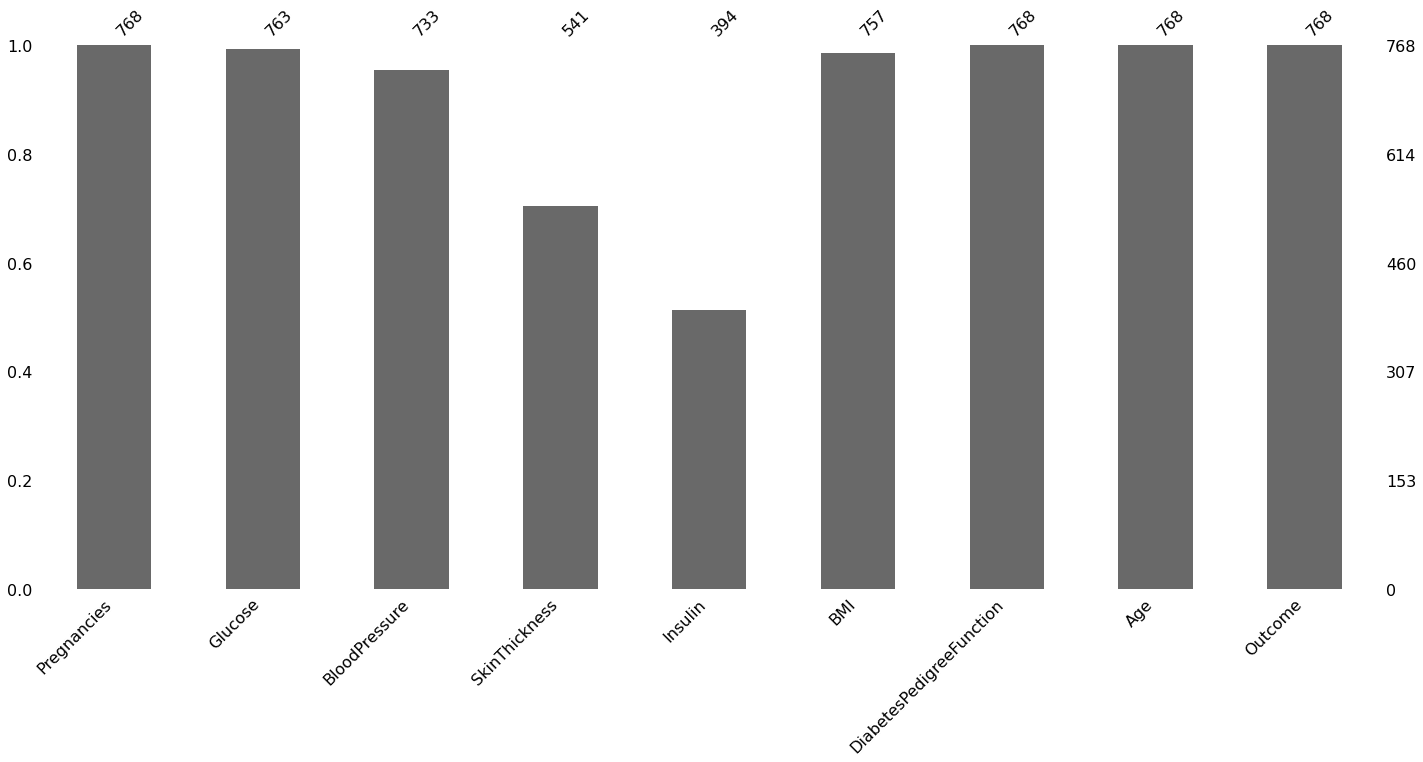

In [36]:
msno.bar(df);

In [37]:
    #Eksik değerleri medyan ile doldurduk
    def median_target(sfy):   
        temp = df[df[sfy].notnull()]
        temp = temp[[sfy, 'Outcome']].groupby(['Outcome'])[[sfy]].median().reset_index()
        return temp

In [38]:
#Eksik gözlemler için verilecek değerlere, hasta olmayanların medyan değeri ve hasta olanların medyan değerleri verilmiştir.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [40]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Aykırı Gözlem Analizi 

In [41]:
num_features = df.select_dtypes(['int64',"float64"]).columns
for feature in num_features:
   
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
   
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies no
Glucose no
BloodPressure no
SkinThickness yes
Insulin yes
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


In [42]:
for feature in num_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    df.loc[df[feature] > upper,feature] = upper

* **Aykırı değer bulunan iki tane değişkenimizi baskılama yöntemiyle doldurduk** 

# Local Outlier Factor (LOF)

In [43]:
# LOF yöntemi ile tüm değişkenler arasındaki uç değerleri belirleriz
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [44]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-2.23935609, -1.99016897, -1.9549226 , -1.72670226, -1.72130757,
       -1.70378401, -1.70169563, -1.6698604 , -1.64133808, -1.64096501,
       -1.6007605 , -1.59826456, -1.59581818, -1.5582072 , -1.55642585,
       -1.53693473, -1.52746389, -1.50934735, -1.50026115, -1.48448965,
       -1.4795311 , -1.47397505, -1.46790918, -1.46636701, -1.46612716,
       -1.4649361 , -1.45460267, -1.45341093, -1.44124822, -1.43679647])

In [45]:
#Lof skorlarına göre eşik değerini seçiyoruz
threshold = np.sort(df_scores)[4]
threshold

-1.721307573391515

In [46]:
#Eşikten daha yüksek olanları siliyoruz
outlier = df_scores > threshold
df = df[outlier]

#  Feature Engineering
Modeller için yeni değişkenler oluşturmak önemlidir. Ancak mantıklı yeni bir değişken oluşturmanız gerekir. Bu veri seti için BMI, İnsülin ve glikoz değişkenlerine göre bazı yeni değişkenler oluşturuldu.

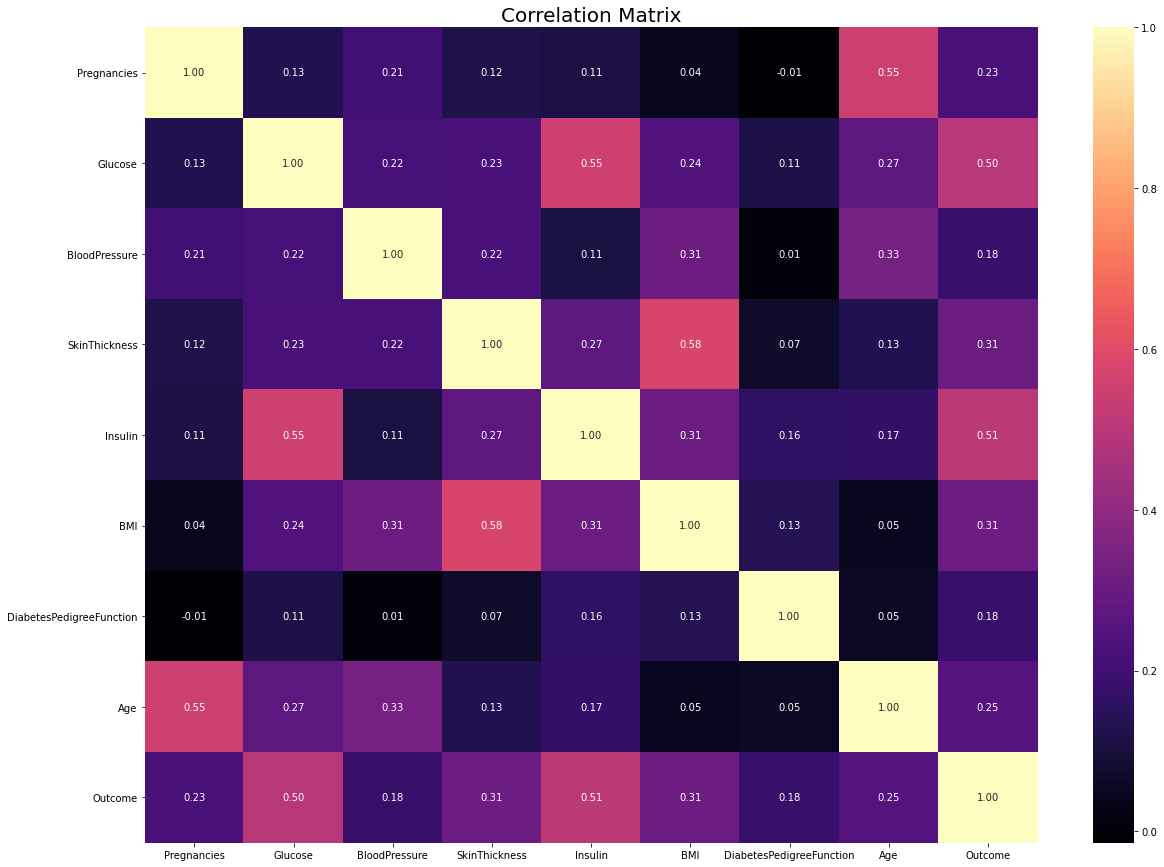

In [47]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [48]:
#  BMI göre bazı aralıklar belirlenmiş ve kategorik değişkenler verilmiştir.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]


In [49]:
df["f2"] = df["Glucose"] * df["Insulin"]
df["f3"] = df["Glucose"] + df["Insulin"]


df["f5"] = df["BMI"] / df["Insulin"]
df["f10"] = df["Pregnancies"] * df["Insulin"]

In [50]:
df.Insulin.head()

0    169.5
1    102.5
2    169.5
3     94.0
4    168.0
Name: Insulin, dtype: float64

In [51]:
#İnsülin değerine göre kategorik bir değişken oluşturma işlemi gerçekleştirilir.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [52]:
# Gerçekleştirilen işlem veri çerçevesine eklendi.
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,f2,f3,f5,f10,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,Obesity 1,25086.0,317.5,0.198230,1017.0,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,Overweight,8712.5,187.5,0.259512,102.5,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,Normal,31018.5,352.5,0.137463,1356.0,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Overweight,8366.0,183.0,0.298936,94.0,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0,Obesity 3,23016.0,305.0,0.256548,0.0,Abnormal


In [53]:
# Bazı aralıklar glukoz değişkenine göre belirlenmiş ve bunlara kategorik değişkenler verilmiştir.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [54]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,f2,f3,f5,f10,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,Obesity 1,25086.0,317.5,0.198230,1017.0,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,Overweight,8712.5,187.5,0.259512,102.5,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,Normal,31018.5,352.5,0.137463,1356.0,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Overweight,8366.0,183.0,0.298936,94.0,Normal,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0,Obesity 3,23016.0,305.0,0.256548,0.0,Abnormal,Secret


In [55]:
y = df["Outcome"]    
X = df.drop('Outcome', axis=1)  

In [56]:
from sklearn.feature_selection import RFECV #Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
from sklearn.ensemble import RandomForestRegressor

def select_features(X,y):
    # numerik olmayan degiskenlerin silinmesi
    X = X.select_dtypes([np.number]).dropna(axis=1)
    
    clf = RandomForestRegressor(random_state=46)
    clf.fit(X, y)
    
    selector = RFECV(clf,cv=10,n_jobs=-1)          
    selector.fit(X, y)
    
    features = pd.DataFrame()
    features['Feature'] = X.columns
    features['Importance'] = clf.feature_importances_
    features.sort_values(by=['Importance'], ascending=False, inplace=True)
    features.set_index('Feature', inplace=True)
    features.plot(kind='bar', figsize=(12, 5))
    
    
    best_columns = list(X.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    

Best Columns 
------------
['Glucose', 'Insulin', 'Age', 'f2', 'f3']



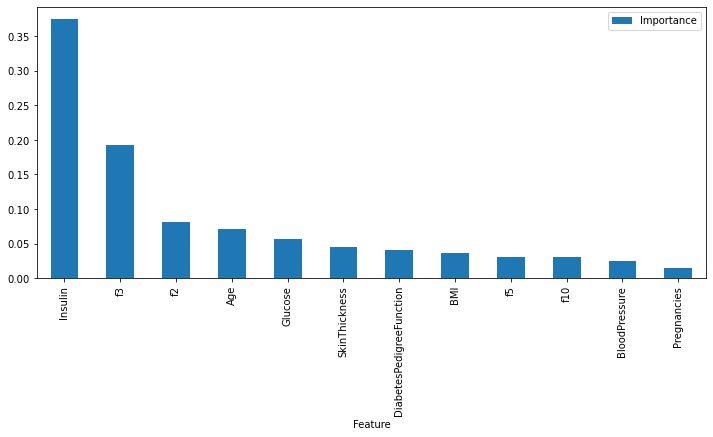

In [57]:
best_features = select_features(X,y)
best_features

# One Hot Encoding

Veri kümesindeki kategorik değişkenler sayısal değerlere dönüştürülmelidir. Bu nedenle, bu dönüştürme işlemleri Etiket Kodlama ve One Hot Encoding yöntemiyle gerçekleştirilir.

In [58]:
# Burada, One Hot Encoding dönüşümü yapılarak, kategorik değişkenler sayısal değerlere dönüştürülmüştür. Aynı zamanda Dummy değişken tuzağından korunur.
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [59]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,f2,...,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,25086.0,...,1,0,0,0,0,0,0,0,0,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,8712.5,...,0,0,0,1,0,1,0,1,0,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,31018.5,...,0,0,0,0,0,0,0,0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,8366.0,...,0,0,0,1,0,1,0,1,0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0,23016.0,...,0,0,1,0,0,0,0,0,0,1


In [60]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [61]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [62]:
y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [63]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,f2,f3,f5,f10
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,25086.0,317.5,0.198230,1017.0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,8712.5,187.5,0.259512,102.5
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,31018.5,352.5,0.137463,1356.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,8366.0,183.0,0.298936,94.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,23016.0,305.0,0.256548,0.0


In [64]:
# Veri setindeki değişkenler, standartlaştırma ile modellerin performansını arttırmada etkili bir faktördür. 
# Birden fazla standardizasyon yöntemi vardır. Bunlar "Normalleştir", "MinMax", "Sağlam" ve "Ölçek" gibi yöntemlerdir.
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [65]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,f2,f3,f5,f10
0,0.6,0.765432,0.000,1.000000,1.000000,0.177778,0.671018,1.235294,0.845241,0.728972,-0.384936,0.944948
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.600000,-0.049608,0.117647,-0.407945,-0.485981,0.045005,-0.329617
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.966667,0.788512,0.176471,1.299300,1.056075,-0.811263,1.417422
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.433333,-0.530026,-0.470588,-0.434465,-0.528037,0.321595,-0.341463
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.233333,2.167102,0.235294,0.686809,0.612150,0.024206,-0.472474


In [66]:
X = pd.concat([X,categorical_df], axis = 1)

In [67]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,f2,f3,...,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.765432,0.000,1.000000,1.000000,0.177778,0.671018,1.235294,0.845241,0.728972,...,1,0,0,0,0,0,0,0,0,1
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.600000,-0.049608,0.117647,-0.407945,-0.485981,...,0,0,0,1,0,1,0,1,0,0
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.966667,0.788512,0.176471,1.299300,1.056075,...,0,0,0,0,0,0,0,0,0,1
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.433333,-0.530026,-0.470588,-0.434465,-0.528037,...,0,0,0,1,0,1,0,1,0,0
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.233333,2.167102,0.235294,0.686809,0.612150,...,0,0,1,0,0,0,0,0,0,1


In [68]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

# Model Tuning

### 1) Random Forests Tuning

In [69]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [70]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The nu

In [71]:
rf_model = RandomForestClassifier(random_state = 12345)

In [72]:
rf_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 351 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 999 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1444 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 13.4min finished


In [73]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 5,
 'n_estimators': 100}

### 1.1) Final Model 

In [74]:
rf_tuned = RandomForestClassifier(**rf_cv.best_params_)

In [75]:
print("cross_val_score : ", cross_val_score(rf_tuned, X, y, cv = 10).mean())

cross_val_score :  0.884706083390294


### 2) LightGBM Tuning

In [76]:
lgbm = LGBMClassifier(random_state = 12345)

In [77]:
#model tuning

lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}


In [78]:
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 351 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.7min finished


In [79]:
gs_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000}

### 2.1) Final Model 

In [80]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,y)

In [81]:
print("cross_val_score : ", cross_val_score(lgbm_tuned, X, y, cv = 10).mean())

cross_val_score :  0.8912679425837322


### 3) XGBoost Tuning

In [82]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [83]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [84]:
xgb_rsc = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, n_iter=50, cv=10, scoring='accuracy', n_jobs=-1, verbose=2).fit(X,y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 351 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.8min finished


In [85]:
#xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 351 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 999 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1444 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1971 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 2578 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 3267 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 4036 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 4887 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 5818 tasks      | elapsed: 49.3min
[Parallel(n_jobs=-1)]: Done 6831 tasks      | elapsed: 58.5min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 62.2min finished


In [86]:
xgb_rsc.best_params_

{'subsample': 1.0,
 'n_estimators': 100,
 'min_samples_split': 0.1,
 'max_depth': 5,
 'learning_rate': 0.1}

### 3.1) Final Model 

In [87]:
xgb_tuned = GradientBoostingClassifier(**xgb_rsc.best_params_).fit(X,y)

In [88]:
print("cross_val_score : ", cross_val_score(xgb_tuned, X, y, cv = 10).mean())

cross_val_score :  0.8939678742310321


# Catboost 

In [89]:
cat_model = CatBoostClassifier(random_state = 12345)

In [90]:
catb_params = {"iterations": [200,500,100],
              "learning_rate": [0.01,0.1],
              "depth": [3,6,8]}

In [91]:
cat_cv_model  = GridSearchCV(cat_model,catb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.0min finished


0:	learn: 0.6833238	total: 18.5ms	remaining: 9.24s
1:	learn: 0.6740361	total: 27.9ms	remaining: 6.95s
2:	learn: 0.6643117	total: 37.8ms	remaining: 6.26s
3:	learn: 0.6536923	total: 47.9ms	remaining: 5.94s
4:	learn: 0.6435848	total: 57.2ms	remaining: 5.66s
5:	learn: 0.6343285	total: 66.4ms	remaining: 5.47s
6:	learn: 0.6270031	total: 75.6ms	remaining: 5.32s
7:	learn: 0.6193919	total: 84.8ms	remaining: 5.21s
8:	learn: 0.6120345	total: 93.8ms	remaining: 5.12s
9:	learn: 0.6048916	total: 104ms	remaining: 5.11s
10:	learn: 0.5974761	total: 114ms	remaining: 5.08s
11:	learn: 0.5896931	total: 124ms	remaining: 5.04s
12:	learn: 0.5833526	total: 129ms	remaining: 4.82s
13:	learn: 0.5747978	total: 139ms	remaining: 4.84s
14:	learn: 0.5677021	total: 149ms	remaining: 4.82s
15:	learn: 0.5611116	total: 159ms	remaining: 4.81s
16:	learn: 0.5531175	total: 169ms	remaining: 4.8s
17:	learn: 0.5456835	total: 180ms	remaining: 4.82s
18:	learn: 0.5390036	total: 192ms	remaining: 4.85s
19:	learn: 0.5322028	total: 201ms

In [92]:
cat_cv_model.best_params_

{'depth': 8, 'iterations': 500, 'learning_rate': 0.01}

### Final Model 

In [93]:
cat_tuned = CatBoostClassifier(**cat_cv_model.best_params_).fit(X,y)

0:	learn: 0.6834761	total: 11.7ms	remaining: 5.84s
1:	learn: 0.6747136	total: 20.7ms	remaining: 5.16s
2:	learn: 0.6650284	total: 32.5ms	remaining: 5.39s
3:	learn: 0.6558452	total: 43.5ms	remaining: 5.39s
4:	learn: 0.6481237	total: 47.9ms	remaining: 4.74s
5:	learn: 0.6393657	total: 59.1ms	remaining: 4.87s
6:	learn: 0.6341366	total: 61.1ms	remaining: 4.3s
7:	learn: 0.6240859	total: 74.4ms	remaining: 4.57s
8:	learn: 0.6151371	total: 86.8ms	remaining: 4.73s
9:	learn: 0.6067723	total: 100ms	remaining: 4.91s
10:	learn: 0.5997265	total: 113ms	remaining: 5.02s
11:	learn: 0.5927387	total: 125ms	remaining: 5.08s
12:	learn: 0.5846103	total: 136ms	remaining: 5.1s
13:	learn: 0.5767528	total: 146ms	remaining: 5.07s
14:	learn: 0.5694571	total: 157ms	remaining: 5.06s
15:	learn: 0.5624396	total: 170ms	remaining: 5.16s
16:	learn: 0.5552826	total: 182ms	remaining: 5.17s
17:	learn: 0.5490198	total: 192ms	remaining: 5.15s
18:	learn: 0.5416963	total: 203ms	remaining: 5.13s
19:	learn: 0.5352061	total: 213ms	

In [94]:
print("cross_val_score : ", cross_val_score(cat_tuned, X, y, cv = 10).mean())

0:	learn: 0.6839707	total: 17.5ms	remaining: 8.72s
1:	learn: 0.6752224	total: 26.2ms	remaining: 6.52s
2:	learn: 0.6656663	total: 35.4ms	remaining: 5.86s
3:	learn: 0.6566185	total: 44.8ms	remaining: 5.55s
4:	learn: 0.6471983	total: 48.8ms	remaining: 4.83s
5:	learn: 0.6391353	total: 58.6ms	remaining: 4.83s
6:	learn: 0.6316815	total: 63.1ms	remaining: 4.44s
7:	learn: 0.6254269	total: 73.1ms	remaining: 4.5s
8:	learn: 0.6162558	total: 82.9ms	remaining: 4.53s
9:	learn: 0.6085520	total: 92.4ms	remaining: 4.53s
10:	learn: 0.6013302	total: 102ms	remaining: 4.52s
11:	learn: 0.5929699	total: 111ms	remaining: 4.5s
12:	learn: 0.5856457	total: 120ms	remaining: 4.5s
13:	learn: 0.5779113	total: 130ms	remaining: 4.5s
14:	learn: 0.5706847	total: 139ms	remaining: 4.49s
15:	learn: 0.5628741	total: 148ms	remaining: 4.47s
16:	learn: 0.5556769	total: 157ms	remaining: 4.46s
17:	learn: 0.5496120	total: 166ms	remaining: 4.44s
18:	learn: 0.5423954	total: 175ms	remaining: 4.44s
19:	learn: 0.5362853	total: 184ms	r

# Cart

In [95]:
cart_model = DecisionTreeClassifier(random_state = 12345)


In [96]:
cart_params = {"max_depth": [2,3,4,5,10,20, 100, 1000],
              "min_samples_split": [2,10,5,30,50,10]}

In [97]:
cart_cv_model  = GridSearchCV(cart_model,cart_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    2.6s finished


In [98]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 10}

### Final Model 

In [99]:
cart_tuned = DecisionTreeClassifier(**cart_cv_model.best_params_).fit(X,y)

In [100]:
print("cross_val_score : ", cross_val_score(cart_tuned, X, y, cv = 10).mean())

cross_val_score :  0.8689166097060834


# Modellerin Karşılaştırılması


In [101]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.01,  max_depth = 3, n_estimators = 1000)))
models.append(('Catboost ', CatBoostClassifier(random_state = 12345, iterations = 500,learning_rate = 0.1, depth = 8)))
models.append(('CART ', DecisionTreeClassifier(random_state = 12345, max_depth = 10, min_samples_split =30)))

# her modeli sırayla değerlendir
results = []
names = []

RF: 0.887321 (0.033640)
XGB: 0.895267 (0.033324)
LightGBM: 0.888636 (0.029303)
0:	learn: 0.6034205	total: 19.6ms	remaining: 9.77s
1:	learn: 0.5426171	total: 28.7ms	remaining: 7.16s
2:	learn: 0.4831340	total: 37.9ms	remaining: 6.27s
3:	learn: 0.4281919	total: 46.2ms	remaining: 5.73s
4:	learn: 0.3832384	total: 54.8ms	remaining: 5.42s
5:	learn: 0.3557112	total: 63.2ms	remaining: 5.21s
6:	learn: 0.3374261	total: 72ms	remaining: 5.07s
7:	learn: 0.3171339	total: 80.2ms	remaining: 4.93s
8:	learn: 0.2943511	total: 88.8ms	remaining: 4.84s
9:	learn: 0.2811605	total: 97ms	remaining: 4.75s
10:	learn: 0.2674084	total: 105ms	remaining: 4.68s
11:	learn: 0.2550541	total: 114ms	remaining: 4.64s
12:	learn: 0.2430047	total: 123ms	remaining: 4.6s
13:	learn: 0.2318946	total: 132ms	remaining: 4.59s
14:	learn: 0.2259278	total: 142ms	remaining: 4.61s
15:	learn: 0.2151986	total: 152ms	remaining: 4.59s
16:	learn: 0.2083410	total: 160ms	remaining: 4.56s
17:	learn: 0.2014891	total: 169ms	remaining: 4.53s
18:	lear

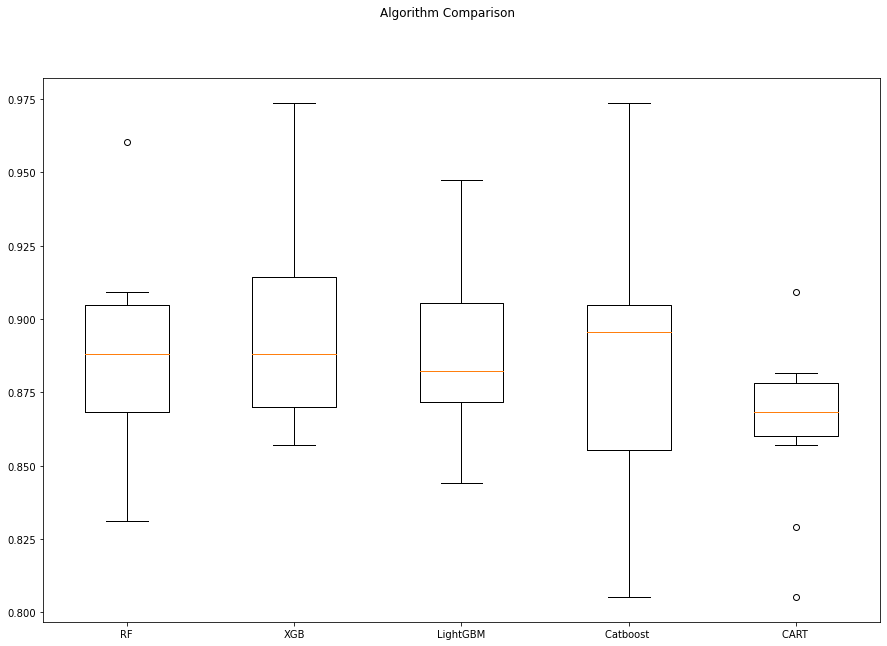

In [102]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [103]:
models




[('RF',
  RandomForestClassifier(max_depth=8, max_features=7, n_estimators=500,
                         random_state=12345)),
 ('XGB',
  GradientBoostingClassifier(max_depth=5, min_samples_split=0.1,
                             random_state=12345)),
 ('LightGBM',
  LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000,
                 random_state=12345)),
 ('Catboost ', <catboost.core.CatBoostClassifier at 0x1fdc3268808>),
 ('CART ',
  DecisionTreeClassifier(max_depth=10, min_samples_split=30, random_state=12345))]